In [2]:
import numpy as np
from pylab import *
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [44]:
def get_trunc_lognorm(mu, sigma, lower_bound, upper_bound=np.inf, size=10000):
    norm_lower = np.log(lower_bound)
    norm_upper = np.log(upper_bound)
    X = stats.truncnorm(
        (norm_lower - mu) / sigma, (norm_upper - mu) / sigma, loc=mu, scale=sigma
    )
    norm_data = X.rvs(size)
    log_norm_data = np.exp(norm_data)
    return log_norm_data

In [71]:
def generate_bilateral_shocks(deposits, law, vol):
    # define middle of the list of banks
    N_max = len(deposits) - len(deposits) % 2  # can not apply a shock on
    # one bank if odd nb
    N_half = int(len(deposits) / 2)

    # create a permutation of all the deposits amounts
    ix = np.arange(len(deposits))  # create an index
    ix_p = np.random.permutation(ix)  # permutation of the index
    deposits_p = deposits[ix_p]  # define the permuted array of deposits

    # apply a negative relative shock on the first half of the banks
    if law == "uniform":
        rho_1 = np.random.uniform(-1, 0, size=N_half)

    elif law == "beta":
        rho_1 = -np.random.beta(1, 1, size=N_half)

    elif law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        mu=-0.5 * std_control**2
        rho_1 = get_trunc_lognorm(mu=0,
            sigma=1,
            lower_bound=0,
            upper_bound=1,
            size=N_half)

    else:
        assert False, ""

    # apply a positive relative shock on the second half of the banks
    rho_2 = -rho_1 * deposits_p[0:N_half] / deposits_p[N_half:N_max]

    # concatenate the relative shocks
    if len(deposits) > N_max:
        rho = np.concatenate([rho_1, rho_2, [0]])
    elif len(deposits) == N_max:
        rho = np.concatenate([rho_1, rho_2])
    else:
        assert False, ""

    # build an un-permuted array of absolute shocks
    shocks = np.zeros(len(deposits))

    # compute the absolute shock from the deposit amount
    ## TO BE MODIFIED !! ##
    shocks[ix_p] = deposits_p * rho - deposits_p

    return shocks

In [72]:
deposits  = np.ones(10000)

In [73]:
shocks = generate_bilateral_shocks(deposits, "log-normal", 1)

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_39540\2744533655.py:2: RuntimeWarning: divide by zero encountered in log
  norm_lower = np.log(lower_bound)


In [74]:
new_deposits = deposits + shocks

In [75]:
log_return = np.log(new_deposits/deposits)

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_39540\1551713691.py:1: RuntimeWarning: invalid value encountered in log
  log_return = np.log(new_deposits/deposits)


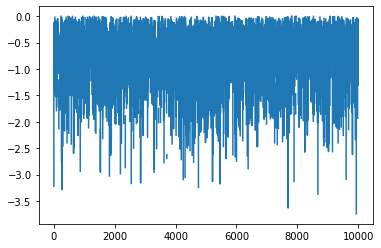

In [76]:
plt.plot(log_return)

In [77]:
np.mean(log_return)

nan

In [40]:
log_data_new = np.concatenate((log_data,log_data_pos))

In [41]:
print(mean(log_data_new), var(log_data_new))

1.6468353208969877 4.679844421995993


In [42]:
np.exp(1/2)

1.6487212707001282

In [43]:
(np.exp(1)-1)*np.exp(1)

4.670774270471604

Text(0.5, 1.0, 'The truncated normal distribution of the intermediate process')

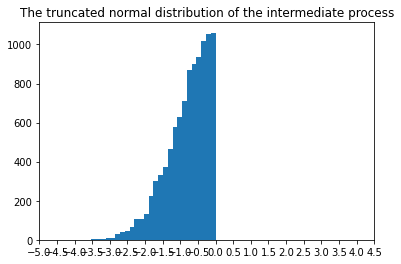

In [11]:

plt.hist(norm_data, bins=30)
plt.xticks(np.arange(mu-5 * sigma, mu + 5 * sigma, 0.5))
plt.title("The truncated normal distribution of the intermediate process")


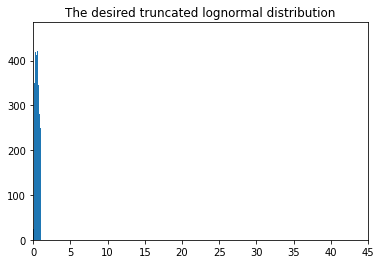

In [12]:
plt.hist(log_data, bins=30)
plt.xticks(np.arange(0, 50, 5))
# plt.xlim(0,50)
plt.title("The desired truncated lognormal distribution")
plt.show()

In [33]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))


def gini2(x):
    total = 0
    for i, xi in enumerate(x):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [39]:
gini2(np.array([1,0,0,0,0]))

0.8

In [38]:
gini2(np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

0.9736842105263158

In [31]:
x = np.array([4,5,6])
for i, j in enumerate(x[:-1]):
    print(i,j)

0 4
1 5


In [30]:
print(enumerate(x[:-1], 1))

In [28]:
for i, j in enumerate(x[:-1]):
    print(i,j)

0 1
1 2


In [26]:
x[:-1]

array([1, 2])

In [40]:
import networkx as nx

In [52]:
adj =np.array([[0,1,0],[0,0,0],[0,0,0]])
adj

array([[0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [53]:
G = nx.from_numpy_matrix(
            adj,
            parallel_edges=False,
            create_using=nx.DiGraph,
        )

In [57]:
degree = G.degree()

In [58]:
degree[0]

1

In [78]:
np.array(degree)[:,1]

array([1, 1, 0])

In [60]:
dic ={1:4,2:3}

In [63]:
list(dic.values())

[4, 3]

In [67]:
a = np.array(list(dic.values()))

In [68]:
a[0]

4

In [69]:
a

array([4, 3])

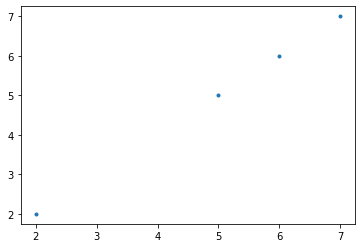

In [79]:
x = np.array([2,5,6,7])
y = np.array([2,5,6,7])
plt.plot(x,y,'.')

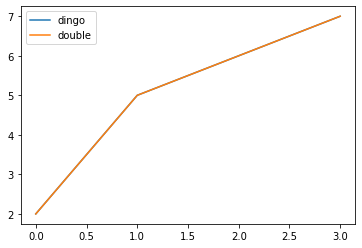

In [82]:
plt.plot(x, label='dingo')
plt.plot(y, label="double")
plt.legend()

In [86]:
li = ['t','y','u','h']

In [87]:
li[-1]

'h'

In [88]:
li[-1] += 'y'
li

['t', 'y', 'u', 'hy']

In [89]:
li = []
li.append(0.0)
li[-1] += 2
li

[2.0]

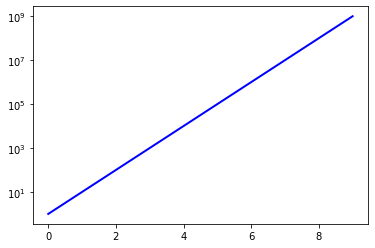

In [5]:

import matplotlib.pyplot as plt
a = [pow(10, i) for i in range(10)]
plt.figure()
plt.plot(a, color='blue', lw=2)
plt.gca().set_yscale('log')

In [3]:
n_banks=150
alpha_pareto=3
beta_init=0.1
beta_reg=0.1
beta_star=0.1
alpha=0.01
gamma=0.03
collateral_value=1.0
initialization_method="pareto"
shock_method="dirichlet"
shocks_vol=0.3
result_location="./results/"
time_steps=5000
save_every=2500
jaccard_period=20


with open('results/param.txt', 'w') as f:
    f.write((
"n_banks={} \n"
"alpha_pareto={} \n"
"beta_init={} \n"
"beta_reg={} \n"
"beta_star={} \n"
"alpha={} \n"
"gamma={} \n"
"collateral_value={} \n"
"initialization_method={} \n"
"shock_method={} \n"
"shocks_vol={} \n"
"result_location={} \n"
"time_steps={} \n"
"save_every={} \n"
"jaccard_period={} \n").format(n_banks,
alpha_pareto,
beta_init,
beta_reg,
beta_star,
alpha,
gamma,
collateral_value,
initialization_method,
shock_method,
shocks_vol,
result_location,
time_steps,
save_every,
jaccard_period))
